In [1]:
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

1. Identificación de Valores Nulos: Identifica todas las columnas que contengan valores nulos en el DataFrame.
2. Selección de Método de Imputación: Discute con tu compañera cuál sería la mejor estrategia para manejar los valores nulos en cada una de las columnas identificadas en el paso anterior.
3. Imputación de Valores Nulos: Implementa el método de imputación seleccionado en el paso 2 para llenar los valores nulos en las columnas.
4. Informe: Añade al final de un jupyter una explicación breve que describa las columnas que tenían valores nulos, cómo decidiste imputarlos y cualquier observación adicional que consideres importante sobre el proceso de limpieza de datos.

In [2]:
df = pd.read_csv("world_data_apply.csv", index_col = 0)
df.sample(5)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitude,longitude,continent
94,Lebanon,667.0,LB,64.3,10400.0,80000.0,17.55,961.0,Beirut,24796.0,130.02,3.0,LBP,2.09,13.4,0.74,5.336704e+10,95.1,26.3,6.4,"Tripoli, Lebanon",78.9,29.0,2.15,Arabic,32.1,2.10,6855713.0,47.0,15.3,32.2,6.23,6084994.0,33.854721,35.862285,Asia
60,France,119.0,FR,52.4,643801.0,307000.0,11.30,33.0,Paris,303276.0,110.05,1.1,EUR,1.88,31.2,1.39,2.715518e+12,102.5,65.6,3.4,Paris,82.5,8.0,11.16,French,6.8,3.27,67059887.0,55.1,24.2,60.7,8.43,54123364.0,46.227638,2.213749,Europe
6,Argentina,17.0,AR,54.3,2780400.0,105000.0,17.02,54.0,Buenos Aires,201348.0,232.75,53.5,ARS,2.26,9.8,1.10,4.496634e+11,109.7,90.0,8.8,Buenos Aires,76.5,39.0,3.35,Spanish,17.6,3.96,44938712.0,61.3,10.1,106.3,9.79,41339571.0,-38.416097,-63.616672,South America
37,Colombia,46.0,CO,40.3,1138910.0,481000.0,14.88,57.0,Bogot�,97814.0,140.95,3.5,COP,1.81,52.7,0.68,3.238028e+11,114.5,55.3,12.2,Bogot�,77.1,83.0,1.23,Spanish,18.3,2.18,50339443.0,68.8,14.4,71.2,9.71,40827302.0,4.570868,-74.297333,South America
120,Nauru,541.0,NR,NaN,21.0,NaN,NaN,674.0,Yaren District,NaN,NaN,NaN,AUD,NaN,NaN,NaN,1.330000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN,NaN,10084.0,NaN,NaN,NaN,NaN,NaN,-0.522778,166.931503,Oceania


In [3]:
df_nulos = pd.DataFrame((df.isnull().sum() / df.shape[0]) * 100, columns = ["%_nulos"])
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
abbreviation,3.589744
agriculturalland,3.589744
landarea,0.512821
armedforcessize,12.307692
birthrate,3.076923
callingcode,0.512821
capital/majorcity,1.538462
co2-emissions,3.589744
cpi,8.717949
cpichange,8.205128


Identificación de nulos en variables tipo object

In [4]:
df.describe(include='O').T

,count,unique,top,freq
country,195,195,Afghanistan,1
abbreviation,188,188,AF,1
capital/majorcity,192,192,Kabul,1
currency-code,180,133,EUR,23
largestcity,189,188,S����,2
officiallanguage,190,76,English,31
continent,195,6,Asia,65


In [5]:
nulos_object=df[df.columns[df.isnull().any()]].select_dtypes(include='O').columns
nulos_object

Index(['abbreviation', 'capital/majorcity', 'currency-code', 'largestcity',
       'officiallanguage'],
      dtype='object')

In [6]:
for columna in nulos_object: 
    print(f"las etiquetas de la columna {columna} tienen la siguiente distribución:")
    display(df[columna].value_counts()/df.shape[0])

las etiquetas de la columna abbreviation tienen la siguiente distribución:


AF    0.005128
PY    0.005128
NE    0.005128
NG    0.005128
KP    0.005128
        ...   
GR    0.005128
GD    0.005128
GT    0.005128
GN    0.005128
ZW    0.005128
Name: abbreviation, Length: 188, dtype: float64

las etiquetas de la columna capital/majorcity tienen la siguiente distribución:


Kabul                    0.005128
Tirana                   0.005128
Wellington               0.005128
Managua                  0.005128
Niamey                   0.005128
                           ...   
Athens                   0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Conakry                  0.005128
Harare                   0.005128
Name: capital/majorcity, Length: 192, dtype: float64

las etiquetas de la columna currency-code tienen la siguiente distribución:


EUR    0.117949
XOF    0.041026
XCD    0.030769
USD    0.030769
XAF    0.025641
         ...   
GMD    0.005128
FJD    0.005128
ETB    0.005128
ERN    0.005128
ZMW    0.005128
Name: currency-code, Length: 133, dtype: float64

las etiquetas de la columna largestcity tienen la siguiente distribución:


S����                    0.010256
Panama City              0.005128
Managua                  0.005128
Niamey                   0.005128
Lagos                    0.005128
                           ...   
Macedonia                0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Kankan                   0.005128
Harare                   0.005128
Name: largestcity, Length: 188, dtype: float64

las etiquetas de la columna officiallanguage tienen la siguiente distribución:


English             0.158974
French              0.128205
Spanish             0.097436
Arabic              0.092308
Portuguese          0.035897
                      ...   
Albanian            0.005128
Jamaican English    0.005128
Lao                 0.005128
Latvian             0.005128
Shona               0.005128
Name: officiallanguage, Length: 76, dtype: float64

Sustitución de nulos en la variable officiallanguage

In [7]:
df['officiallanguage'].mode()

0    English
dtype: object

In [8]:
df['officiallanguage']=df['officiallanguage'].fillna(df['officiallanguage'].mode()[0])

In [9]:
df['officiallanguage'].isna().sum()

0

Sustitución de los valores nulos de 'abbreviation', 'capital/majorcity', 'currency-code', 'largestcity' por etiqueta Unknown

In [10]:
columnas_object_null=['abbreviation', 'capital/majorcity', 'currency-code', 'largestcity']

for columna in columnas_object_null: 
    df[columna]=df[columna].fillna('Unknown')

In [11]:
df[columnas_object_null].isna().sum()

abbreviation         0
capital/majorcity    0
currency-code        0
largestcity          0
dtype: int64

Identificación de nulos en variables tipo numéricas

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
density,195.0,3.567641e+02,1.982889e+03,2.000000e+00,3.550000e+01,8.900000e+01,2.165000e+02,2.633700e+04
agriculturalland,188.0,3.911755e+01,2.178305e+01,6.000000e-01,2.170000e+01,3.960000e+01,5.537500e+01,8.260000e+01
landarea,194.0,6.896244e+05,1.921609e+06,0.000000e+00,2.382825e+04,1.195110e+05,5.242560e+05,1.709824e+07
armedforcessize,171.0,1.592749e+05,3.806288e+05,0.000000e+00,1.100000e+04,3.100000e+04,1.420000e+05,3.031000e+06
birthrate,189.0,2.021497e+01,9.945774e+00,5.900000e+00,1.130000e+01,1.795000e+01,2.875000e+01,4.608000e+01
callingcode,194.0,3.605464e+02,3.232364e+02,1.000000e+00,8.250000e+01,2.555000e+02,5.067500e+02,1.876000e+03
co2-emissions,188.0,1.777992e+05,8.387903e+05,1.100000e+01,2.304250e+03,1.230300e+04,6.388425e+04,9.893038e+06
cpi,178.0,1.904610e+02,3.979474e+02,9.903000e+01,1.138850e+02,1.253400e+02,1.572650e+02,4.583710e+03
cpichange,179.0,6.722346e+00,2.445041e+01,-4.300000e+00,1.000000e+00,2.300000e+00,4.250000e+00,2.549000e+02
fertilityrate,188.0,2.698138e+00,1.282267e+00,9.800000e-01,1.705000e+00,2.245000e+00,3.597500e+00,6.910000e+00


In [13]:
nulos_num=df[df.columns[df.isna().any()]].select_dtypes(include = np.number).columns
nulos_num

Index(['agriculturalland', 'landarea', 'armedforcessize', 'birthrate',
       'callingcode', 'co2-emissions', 'cpi', 'cpichange', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
       'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand',
       'population', 'populationlaborforceparticipation', 'taxrevenue',
       'totaltaxrate', 'unemploymentrate', 'urban_population', 'latitude',
       'longitude'],
      dtype='object')

In [14]:
porcentaje_nulos_num=df[nulos_num].isna().sum()/df.shape[0]
porcentaje_nulos_num

agriculturalland                     0.035897
landarea                             0.005128
armedforcessize                      0.123077
birthrate                            0.030769
callingcode                          0.005128
co2-emissions                        0.035897
cpi                                  0.087179
cpichange                            0.082051
fertilityrate                        0.035897
forestedarea                         0.035897
gasolineprice                        0.102564
gdp                                  0.010256
grossprimaryeducationenrollment      0.035897
grosstertiaryeducationenrollment     0.061538
infantmortality                      0.030769
lifeexpectancy                       0.041026
maternalmortalityratio               0.071795
minimumwage                          0.230769
outofpockethealthexpenditure         0.035897
physiciansperthousand                0.035897
population                           0.005128
populationlaborforceparticipation 

Aplicación de la mediana/media para columnas que estén por debajo del 5% de valores nulos

In [15]:
porcentaje_nulos_num[porcentaje_nulos_num<0.05]


agriculturalland                   0.035897
landarea                           0.005128
birthrate                          0.030769
callingcode                        0.005128
co2-emissions                      0.035897
fertilityrate                      0.035897
forestedarea                       0.035897
gdp                                0.010256
grossprimaryeducationenrollment    0.035897
infantmortality                    0.030769
lifeexpectancy                     0.041026
outofpockethealthexpenditure       0.035897
physiciansperthousand              0.035897
population                         0.005128
urban_population                   0.025641
latitude                           0.005128
longitude                          0.005128
dtype: float64

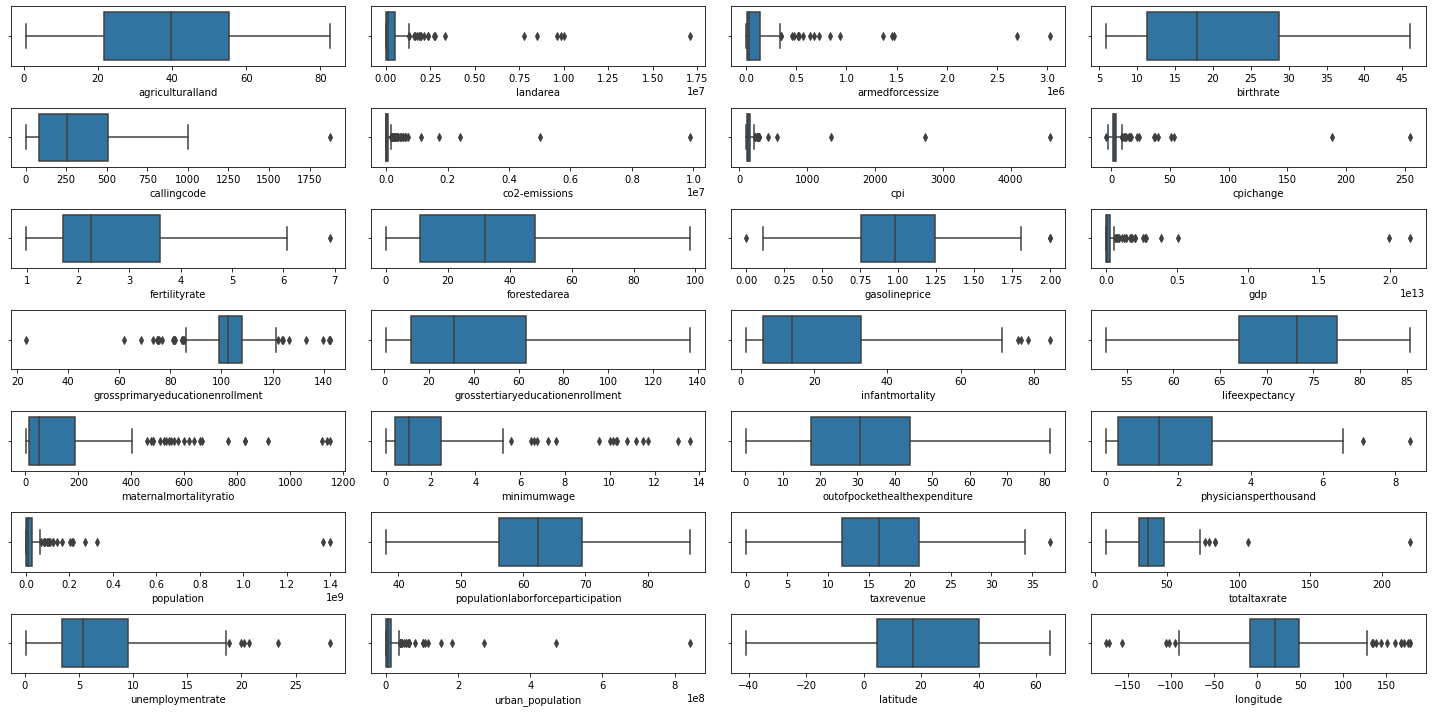

In [16]:
#comprobamos que los valores para descartar que haya atípicos significativos y así decicir si escoger 
# la mediana que es más robusta para presencia de valores atipicos significactivos o la media

fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20, 10))

axes = axes.flat

for indice, col in enumerate(nulos_num):
    sns.boxplot(x=col, data=df, ax=axes[indice])

plt.tight_layout()

plt.show();

#En las columnas que están por debajo del 5% aparecen bastantes valores atipicos por lo que vamos a sustituir por la mediana que es más robusta

In [17]:
cinco_por_debajo=['agriculturalland', 'landarea', 'birthrate','callingcode', 'co2-emissions', 'fertilityrate', 'forestedarea', 'gdp', 'grossprimaryeducationenrollment', 'infantmortality', 'lifeexpectancy',
'outofpockethealthexpenditure','physiciansperthousand','population','urban_population','latitude','longitude']


for col in cinco_por_debajo:

    mediana= df[col].median()

    df[col] = df[col].fillna(mediana)


In [18]:
df[cinco_por_debajo].isna().sum()

agriculturalland                   0
landarea                           0
birthrate                          0
callingcode                        0
co2-emissions                      0
fertilityrate                      0
forestedarea                       0
gdp                                0
grossprimaryeducationenrollment    0
infantmortality                    0
lifeexpectancy                     0
outofpockethealthexpenditure       0
physiciansperthousand              0
population                         0
urban_population                   0
latitude                           0
longitude                          0
dtype: int64

Aplicación de Iteartive Imputer y KNN para las variables que tienen un porcentaje mayor de 5% en nulos. 

In [19]:
porcentaje_nulos_num[porcentaje_nulos_num>0.05]

armedforcessize                      0.123077
cpi                                  0.087179
cpichange                            0.082051
gasolineprice                        0.102564
grosstertiaryeducationenrollment     0.061538
maternalmortalityratio               0.071795
minimumwage                          0.230769
populationlaborforceparticipation    0.097436
taxrevenue                           0.133333
totaltaxrate                         0.061538
unemploymentrate                     0.097436
dtype: float64

In [20]:
#primero hacemos una copia para poder incluir las columnas de cada metodo y decicir que usamos para cada variable teniendo en cuentas sus estadisticos

df_copy=df.copy()
df_copy.sample(5)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitude,longitude,continent
37,Colombia,46.0,CO,40.3,1138910.0,481000.0,14.88,57.0,Bogot�,97814.0,140.95,3.5,COP,1.81,52.7,0.68,3.238028e+11,114.5,55.3,12.2,Bogot�,77.1,83.0,1.23,Spanish,18.3,2.18,50339443.0,68.8,14.4,71.2,9.71,40827302.0,4.570868,-74.297333,South America
43,Cyprus,131.0,CY,12.2,9251.0,16000.0,10.46,357.0,Nicosia,6626.0,102.51,0.3,EUR,1.33,18.7,1.23,2.456465e+10,99.3,75.9,1.9,Statos�������,80.8,6.0,NaN,Greek,43.9,1.95,1198575.0,63.1,24.5,22.4,7.27,800708.0,35.126413,33.429859,Europe
67,Grenada,331.0,GD,23.5,349.0,NaN,16.47,1.0,"St. George's, Grenada",268.0,107.43,0.8,XCD,2.06,50.0,1.12,1.228170e+09,106.9,104.6,13.7,"St. George's, Grenada",72.4,25.0,NaN,English,57.0,1.41,112003.0,NaN,19.4,47.8,NaN,40765.0,12.116500,-61.679000,North America
154,Seychelles,214.0,SC,3.4,455.0,0.0,17.10,248.0,"Victoria, Seychelles",605.0,129.96,1.8,SCR,2.41,88.4,NaN,1.698843e+09,100.4,17.1,12.4,"Victoria, Seychelles",72.8,53.0,2.00,French,2.5,0.95,97625.0,NaN,34.1,30.1,NaN,55762.0,-4.679574,55.491977,Africa
9,Austria,109.0,AT,32.4,83871.0,21000.0,9.70,43.0,Vienna,61448.0,118.06,1.5,EUR,1.47,46.9,1.20,4.463147e+11,103.1,85.1,2.9,Vienna,81.6,5.0,NaN,German,17.9,5.17,8877067.0,60.7,25.4,51.4,4.67,5194416.0,47.516231,14.550072,Europe


In [21]:
#aplicamos iterative
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

cinco_por_arriba=['armedforcessize','cpi','cpichange','gasolineprice','grosstertiaryeducationenrollment','maternalmortalityratio','minimumwage','populationlaborforceparticipation','taxrevenue','totaltaxrate', 'unemploymentrate']

cinco_por_arriba_iterative = imputer_iterative.fit_transform(df_copy[cinco_por_arriba])


In [22]:
#creamos nuevas columnas para incluirlas en el DF
df_copy[['IT_armedforcessize','IT_cpi','IT_cpichange','IT_gasolineprice','IT_grosstertiaryeducationenrollment','IT_maternalmortalityratio','IT_minimumwage','IT_populationlaborforceparticipation','IT_taxrevenue','IT_totaltaxrate', 'IT_unemploymentrate']]=cinco_por_arriba_iterative

In [23]:
df_copy.sample(3)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitude,longitude,continent,IT_armedforcessize,IT_cpi,IT_cpichange,IT_gasolineprice,IT_grosstertiaryeducationenrollment,IT_maternalmortalityratio,IT_minimumwage,IT_populationlaborforceparticipation,IT_taxrevenue,IT_totaltaxrate,IT_unemploymentrate
97,Libya,4.0,LY,8.7,1759540.0,0.0,18.83,218.0,Unknown,50564.0,125.71,2.6,LYD,2.24,0.1,0.11,5.207625e+10,109.0,60.5,10.2,Unknown,72.7,72.0,1.88,Arabic,36.7,2.09,6777452.0,49.7,NaN,32.6,18.56,5448597.0,26.335100,17.228331,Africa,0.0,125.71,2.6,0.11,60.500000,72.0,1.88,49.7,18.370083,32.6,18.56
20,Bolivia,11.0,BO,34.8,1098581.0,71000.0,21.75,591.0,Sucre,21606.0,148.32,1.8,BOB,2.73,50.3,0.71,4.089532e+10,98.2,NaN,21.8,Santa Cruz de la Sierra,71.2,155.0,1.36,Spanish,25.9,1.59,11513100.0,71.8,17.0,83.7,3.50,8033035.0,-16.290154,-63.588653,South America,71000.0,148.32,1.8,0.71,38.759184,155.0,1.36,71.8,17.000000,83.7,3.50
172,Tanzania,67.0,TZ,44.8,947300.0,28000.0,36.70,255.0,Dodoma,11973.0,187.43,3.5,TZS,4.89,51.6,0.87,6.317707e+10,94.2,4.0,37.6,Dar es Salaam,65.0,524.0,0.09,Swahili,26.1,0.01,58005463.0,83.4,11.5,43.8,1.98,20011885.0,-6.369028,34.888822,Asia,28000.0,187.43,3.5,0.87,4.000000,524.0,0.09,83.4,11.500000,43.8,1.98


In [24]:
#aplicamos knn

imputer_knn = KNNImputer(n_neighbors = 5)

cinco_por_arriba_knn = imputer_knn.fit_transform(df_copy[cinco_por_arriba])


In [25]:
#creamos nuevas columnas para incluirlas en el DF
df_copy[['K_armedforcessize','K_cpi','K_cpichange','K_gasolineprice','K_grosstertiaryeducationenrollment','K_maternalmortalityratio','K_minimumwage','K_populationlaborforceparticipation','K_taxrevenue','K_totaltaxrate', 'K_unemploymentrate']]=cinco_por_arriba_knn

In [26]:
df_copy.sample(3)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitude,longitude,continent,IT_armedforcessize,IT_cpi,IT_cpichange,IT_gasolineprice,IT_grosstertiaryeducationenrollment,IT_maternalmortalityratio,IT_minimumwage,IT_populationlaborforceparticipation,IT_taxrevenue,IT_totaltaxrate,IT_unemploymentrate,K_armedforcessize,K_cpi,K_cpichange,K_gasolineprice,K_grosstertiaryeducationenrollment,K_maternalmortalityratio,K_minimumwage,K_populationlaborforceparticipation,K_taxrevenue,K_totaltaxrate,K_unemploymentrate
194,Zimbabwe,38.0,ZW,41.9,390757.0,51000.0,30.68,263.0,Harare,10983.0,105.51,0.9,Unknown,3.62,35.5,1.34,2.144076e+10,109.9,10.0,33.9,Harare,61.2,458.0,NaN,Shona,25.8,0.21,14645468.0,83.1,20.7,31.6,4.95,4717305.0,-19.015438,29.154857,Asia,51000.0,105.51,0.9,1.34,10.0,458.0,0.931636,83.1,20.7,31.6,4.95,51000.0,105.51,0.9,1.34,10.0,458.0,4.966,83.1,20.7,31.6,4.95
155,Sierra Leone,111.0,SL,54.7,71740.0,9000.0,33.41,232.0,Freetown,1093.0,234.16,14.8,SLL,4.26,43.1,1.08,3.941474e+09,112.8,2.0,78.5,Freetown,54.3,1120.0,0.57,English,38.2,0.03,7813215.0,57.9,8.6,30.7,4.43,3319366.0,8.460555,-11.779889,Africa,9000.0,234.16,14.8,1.08,2.0,1120.0,0.570000,57.9,8.6,30.7,4.43,9000.0,234.16,14.8,1.08,2.0,1120.0,0.570,57.9,8.6,30.7,4.43
94,Lebanon,667.0,LB,64.3,10400.0,80000.0,17.55,961.0,Beirut,24796.0,130.02,3.0,LBP,2.09,13.4,0.74,5.336704e+10,95.1,26.3,6.4,"Tripoli, Lebanon",78.9,29.0,2.15,Arabic,32.1,2.10,6855713.0,47.0,15.3,32.2,6.23,6084994.0,33.854721,35.862285,Asia,80000.0,130.02,3.0,0.74,26.3,29.0,2.150000,47.0,15.3,32.2,6.23,80000.0,130.02,3.0,0.74,26.3,29.0,2.150,47.0,15.3,32.2,6.23


Comparamos para cada variable numérica ambos métodos (KNN e Iterative)

In [28]:
df_copy.describe()[['armedforcessize','IT_armedforcessize','K_armedforcessize']]

,armedforcessize,IT_armedforcessize,K_armedforcessize
count,1.710000e+02,1.950000e+02,1.950000e+02
mean,1.592749e+05,1.592749e+05,1.631035e+05
std,3.806288e+05,3.563077e+05,3.616670e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+04,1.250000e+04,1.200000e+04
50%,3.100000e+04,4.200000e+04,4.000000e+04
75%,1.420000e+05,1.592749e+05,1.592749e+05
max,3.031000e+06,3.031000e+06,3.031000e+06


In [29]:
df_copy.describe()[['cpi','IT_cpi','K_cpi']]

,cpi,IT_cpi,K_cpi
count,178.000000,195.000000,195.000000
mean,190.460955,190.351273,186.143676
std,397.947380,380.251904,380.515709
min,99.030000,94.815170,99.030000
25%,113.885000,114.415000,113.837000
50%,125.340000,129.610000,125.080000
75%,157.265000,167.790000,158.450000
max,4583.710000,4583.710000,4583.710000


In [30]:
df_copy.describe()[['cpichange','IT_cpichange','K_cpichange']]

,cpichange,IT_cpichange,K_cpichange
count,179.000000,195.000000,195.000000
mean,6.722346,6.707829,6.445086
std,24.450414,23.421921,23.451454
min,-4.300000,-4.300000,-4.300000
25%,1.000000,1.050000,1.000000
50%,2.300000,2.600000,2.300000
75%,4.250000,5.600000,4.600000
max,254.900000,254.900000,254.900000


In [31]:
df_copy.describe()[['gasolineprice','IT_gasolineprice','K_gasolineprice']]

,gasolineprice,IT_gasolineprice,K_gasolineprice
count,175.000000,195.000000,195.000000
mean,1.002457,1.011195,1.019755
std,0.368858,0.352639,0.359959
min,0.000000,0.000000,0.000000
25%,0.755000,0.790000,0.790000
50%,0.980000,1.011195,1.002457
75%,1.240000,1.205000,1.260000
max,2.000000,2.000000,2.000000


In [32]:
df_copy.describe()[['grosstertiaryeducationenrollment','IT_grosstertiaryeducationenrollment','K_grosstertiaryeducationenrollment']]

,grosstertiaryeducationenrollment,IT_grosstertiaryeducationenrollment,K_grosstertiaryeducationenrollment
count,183.000000,195.000000,195.000000
mean,37.963388,37.750872,38.159984
std,29.261022,28.557482,28.456068
min,0.800000,-10.628725,0.800000
25%,12.150000,12.500000,12.650000
50%,31.200000,34.600000,34.600000
75%,63.150000,61.100000,61.100000
max,136.600000,136.600000,136.600000


In [33]:
df_copy.describe()[['maternalmortalityratio','IT_maternalmortalityratio','K_maternalmortalityratio']]

,maternalmortalityratio,IT_maternalmortalityratio,K_maternalmortalityratio
count,181.000000,195.000000,195.000000
mean,160.392265,159.530949,156.209032
std,233.502024,225.590062,226.018118
min,2.000000,-32.186029,2.000000
25%,13.000000,15.500000,15.500000
50%,53.000000,65.000000,58.000000
75%,186.000000,184.000000,175.000000
max,1150.000000,1150.000000,1150.000000


In [34]:
df_copy.describe()[['minimumwage','IT_minimumwage','K_minimumwage']]

,minimumwage,IT_minimumwage,K_minimumwage
count,150.000000,195.000000,195.000000
mean,2.194133,2.150705,2.670537
std,2.970796,2.781663,2.816353
min,0.010000,-7.557676,0.010000
25%,0.402500,0.485000,0.530000
50%,1.045000,1.230000,1.560000
75%,2.447500,2.627011,4.446000
max,13.590000,13.590000,13.590000


In [35]:
df_copy.describe()[['populationlaborforceparticipation','IT_populationlaborforceparticipation','K_populationlaborforceparticipation']]

,populationlaborforceparticipation,IT_populationlaborforceparticipation,K_populationlaborforceparticipation
count,176.000000,195.000000,195.000000
mean,62.738068,62.678334,62.694104
std,10.502907,9.989868,10.038747
min,38.000000,38.000000,38.000000
25%,56.150000,57.250000,57.250000
50%,62.450000,62.675300,62.600000
75%,69.500000,68.300000,68.550000
max,86.800000,86.800000,86.800000


In [36]:
df_copy.describe()[['taxrevenue','IT_taxrevenue','K_taxrevenue']]

,taxrevenue,IT_taxrevenue,K_taxrevenue
count,169.000000,195.000000,195.000000
mean,16.573964,16.169396,16.945589
std,6.961632,7.284736,6.646717
min,0.000000,-23.882994,0.000000
25%,11.700000,11.800000,12.250000
50%,16.300000,16.169396,17.100000
75%,21.100000,20.300000,21.160000
max,37.200000,37.200000,37.200000


In [37]:
df_copy.describe()[['totaltaxrate','IT_totaltaxrate','K_totaltaxrate']]

,totaltaxrate,IT_totaltaxrate,K_totaltaxrate
count,183.000000,195.000000,195.000000
mean,40.822404,40.882017,40.815959
std,20.557662,19.929420,19.924890
min,8.000000,8.000000,8.000000
25%,30.600000,30.900000,30.900000
50%,37.200000,37.900000,37.700000
75%,48.000000,47.740593,47.300000
max,219.600000,219.600000,219.600000


In [38]:
df_copy.describe()[['unemploymentrate','IT_unemploymentrate','K_unemploymentrate']]

,unemploymentrate,IT_unemploymentrate,K_unemploymentrate
count,176.000000,195.000000,195.000000
mean,6.886364,6.914785,6.978307
std,5.079216,4.827897,4.874994
min,0.090000,0.090000,0.090000
25%,3.395000,3.590000,3.590000
50%,5.360000,5.920000,5.610000
75%,9.490000,8.874349,9.510000
max,28.180000,28.180000,28.180000


In [39]:
df_copy.drop(['armedforcessize', 'cpi','cpichange', 'gasolineprice', 'grosstertiaryeducationenrollment',  'maternalmortalityratio', 'minimumwage', 
              'populationlaborforceparticipation',  'taxrevenue', 'totaltaxrate', 'unemploymentrate', 'IT_armedforcessize', 'IT_cpi', 
              'IT_cpichange', 'IT_gasolineprice', 'IT_grosstertiaryeducationenrollment','IT_maternalmortalityratio', 
          'IT_minimumwage', 'IT_populationlaborforceparticipation', 'IT_taxrevenue','IT_totaltaxrate', 'IT_unemploymentrate'], axis=1, inplace=True)

In [41]:
columnas_definitivas={'K_armedforcessize': 'armedforcessize', 'K_cpi': 'cpi', 'K_cpichange':'cpichange', 'K_gasolineprice': 'gasolineprice', 'K_grosstertiaryeducationenrollment': 'grosstertiaryeducationenrollment',
                      'K_maternalmortalityratio': 'maternalmortalityratio', 'K_minimumwage':'minimumwage' , 'K_populationlaborforceparticipation':'populationlaborforceparticipation',
                      'K_totaltaxrate':'totaltaxrate', 'K_unemploymentrate':'unemploymentrate', 'K_taxrevenue': 'taxrevenue'}

df_copy.rename(columns = columnas_definitivas, inplace = True)

In [42]:
df_copy.sample(3)

,country,density,abbreviation,agriculturalland,landarea,birthrate,callingcode,capital/majorcity,co2-emissions,currency-code,fertilityrate,forestedarea,gdp,grossprimaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,urban_population,latitude,longitude,continent,armedforcessize,cpi,cpichange,gasolineprice,grosstertiaryeducationenrollment,maternalmortalityratio,minimumwage,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate
25,Bulgaria,64.0,BG,46.3,110879.0,8.90,359.0,Sofia,41708.0,BGN,1.56,35.4,8.600000e+10,89.3,5.9,Sofia,74.9,Bulgarian,47.7,4.03,6975761.0,5256027.0,42.733883,25.485830,Europe,31000.0,114.42,3.1,1.11,71.0,10.0,1.57,55.4,20.2,28.3,4.34
114,Mongolia,2.0,MN,71.5,1564116.0,24.13,976.0,Ulaanbaatar,25368.0,MNT,2.90,8.0,1.385285e+10,104.0,14.0,Ulaanbaatar,69.7,Mongolian,39.3,2.86,3225167.0,2210626.0,46.862496,103.846656,Asia,18000.0,195.76,7.3,0.72,65.6,45.0,0.65,59.7,16.8,25.7,6.01
193,Zambia,25.0,ZM,32.1,752618.0,36.19,260.0,Lusaka,5141.0,ZMW,4.63,65.2,2.306472e+10,98.7,40.4,Lusaka,63.5,English,27.5,1.19,17861030.0,7871713.0,-13.133897,27.849332,Asia,16000.0,212.31,9.2,1.40,4.1,213.0,0.24,74.6,16.2,15.6,11.43


In [44]:
#comprobamos si quedan nulos
df_copy.isna().sum()

country                              0
density                              0
abbreviation                         0
agriculturalland                     0
landarea                             0
birthrate                            0
callingcode                          0
capital/majorcity                    0
co2-emissions                        0
currency-code                        0
fertilityrate                        0
forestedarea                         0
gdp                                  0
grossprimaryeducationenrollment      0
infantmortality                      0
largestcity                          0
lifeexpectancy                       0
officiallanguage                     0
outofpockethealthexpenditure         0
physiciansperthousand                0
population                           0
urban_population                     0
latitude                             0
longitude                            0
continent                            0
armedforcessize          

In [45]:
df_copy.to_csv('world_data_sin_nulos.csv')

# Explicación breve que describa las columnas que tenían valores nulos, cómo decidiste imputarlos y cualquier observación adicional que consideres importante sobre el proceso de limpieza de datos.
- Primero revisamos qué columnas tenían nulos. 
- Separamos las numéricas de las categóricas y empezamos a realizar el analisis de cada grupo de variables. 
    - Categóricas: 
        - Revisamos los valores únicos de cada columna y su porcentaje en cuanto al total de los valores. 
        - Decidimos etiquetar con la categoría "Unknown" a las variables currency-code, abbreviation, capital y largestcity por tratarse de valores únicos para cada país. 
        - Decidimos reasignar el valor de Inglés (moda) para la variable officiallenguage por tratarse de una variable con muy bajo porcentaje de nulos y ser ese idioma el más común seguido del Francés.
    - Numéricas: 
        - Decidimos separar las numéricas en dos subgrupos: uno con un porcentaje de nulos inferiorr al 5% y otro superior al 5%. 
            - Menos del 5% de nulos: 
                - Hemos realizado un analisis de los valores atípicos para determinar si era mejor escoger la media o la mediana. Nos hemos decantado por la mediana al haber algunas variables con varios valores atípicos muy extremos. 

            - Más del 5% de nulos: 
                - Hemos realizado imputaciones según los métodos Iterativos y K-vecinos. 
                - Al comparar los estadisticos básicos de cada variable y sus correspondientes valores aplicando los métodos nos hemos encontrado valores extremos en los mínimos de grosstertiaryeducationenrollment, maternalmortalityratio, minimumwage y taxrevenue de las columnas IT de estos valores por lo que hemos escogido el valor K para la imputación de los nulos en este caso. 

